# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [27]:
from matplotlib.patches import Ellipse
from scipy.stats import norm, chi2
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

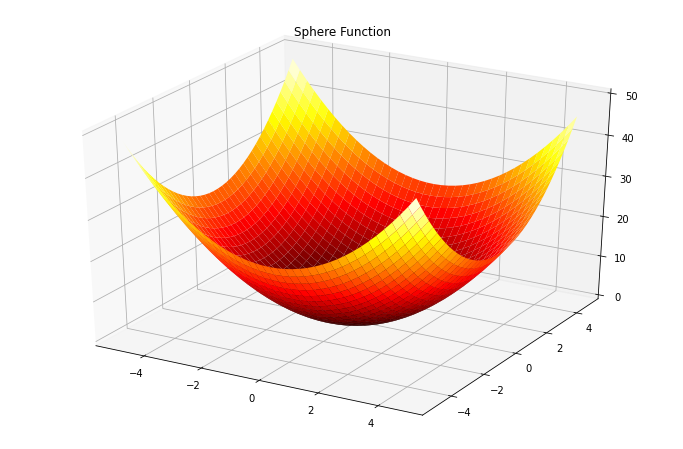

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

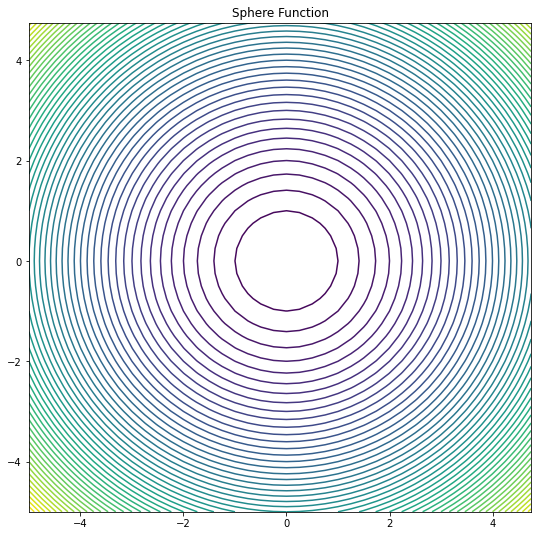

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

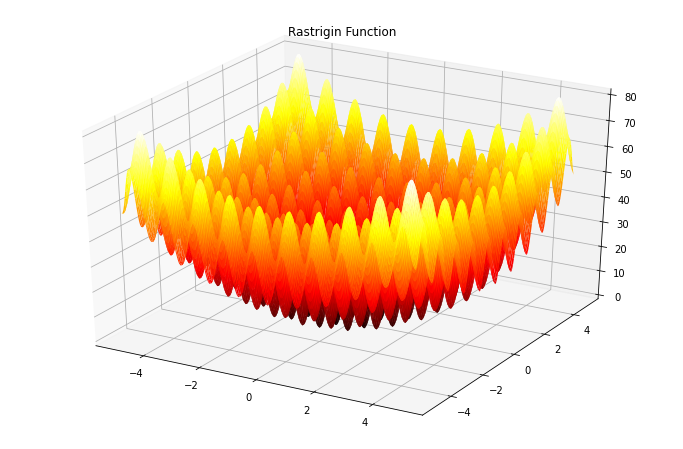

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

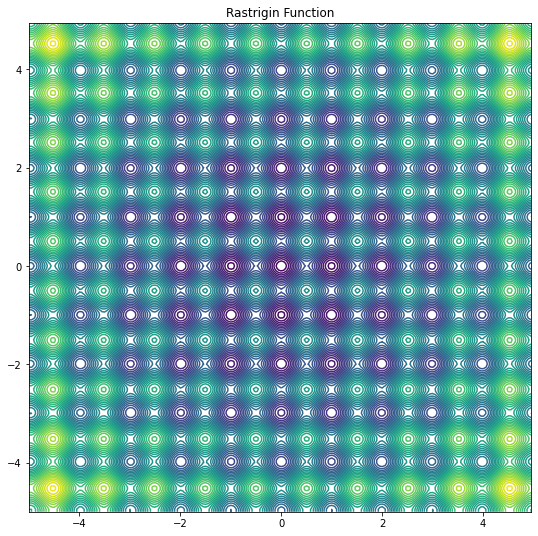

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

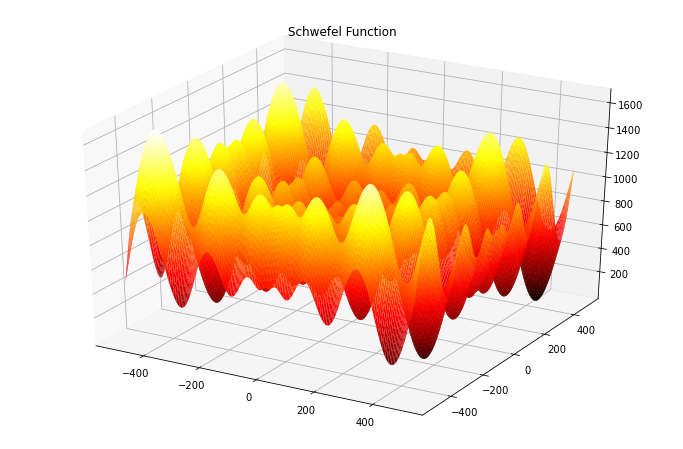

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

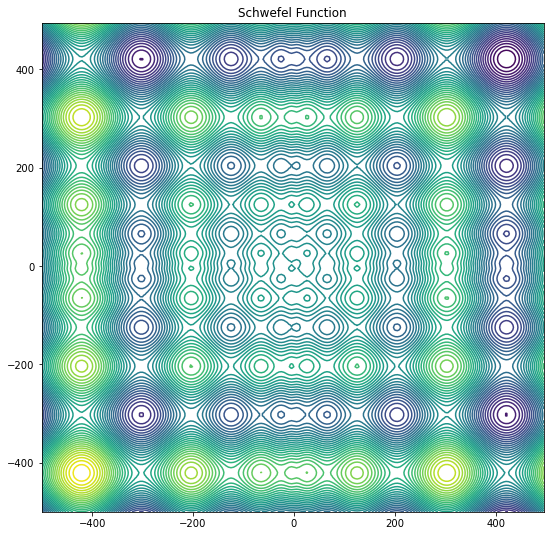

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

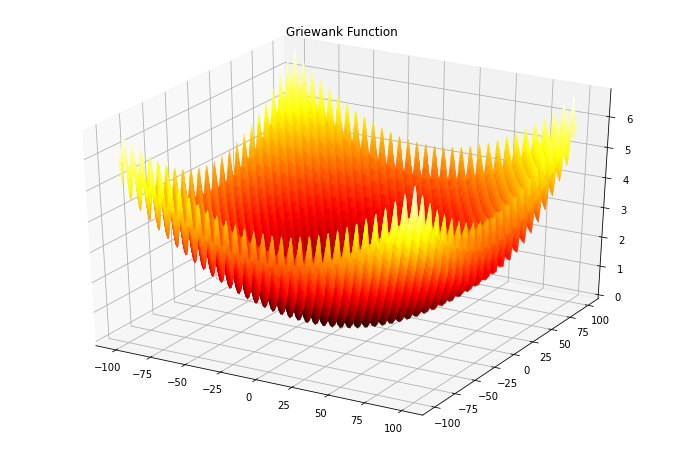

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

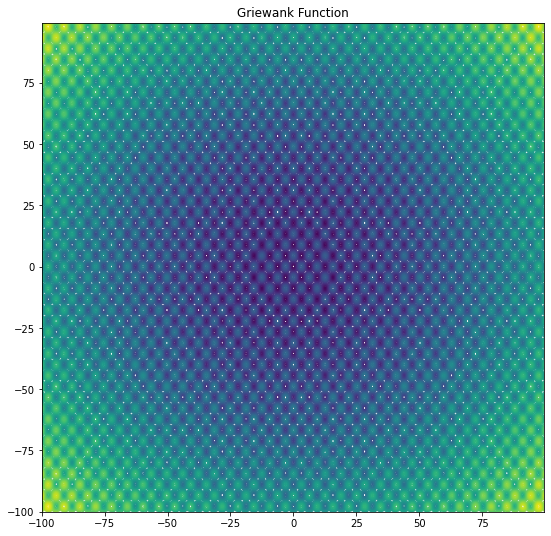

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [16]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [18]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

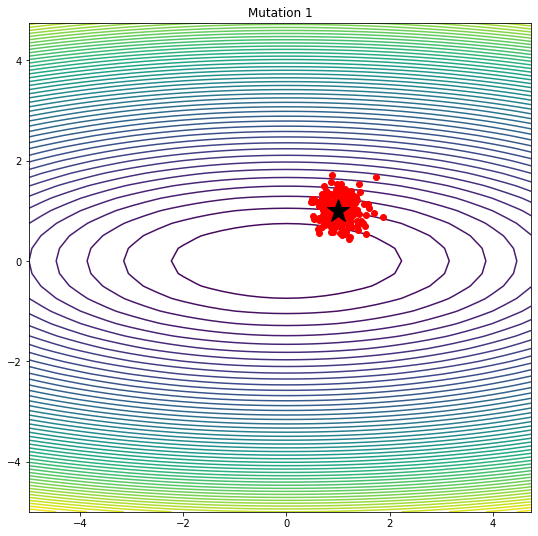

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [19]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

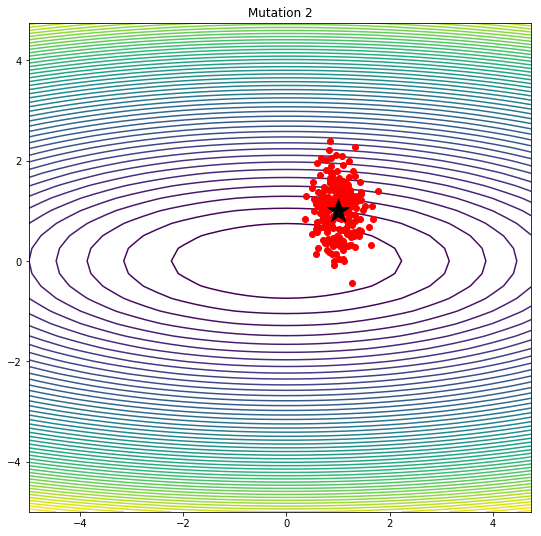

In [20]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [21]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

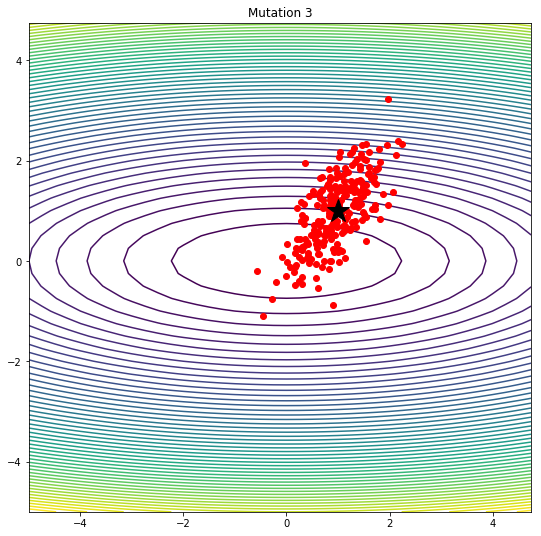

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

In [62]:
# def plot_point_cov(points, q=0.95, ax=None):
#     pos = points.mean(axis=0)
#     print(pos)
#     cov = np.cov(points, rowvar=False)
#     print(cov)
#     return plot_cov_ellipse(cov, pos, q, ax)

# def plot_cov_ellipse(cov, pos, q=0.95, ax=None):
#     def eigsorted(cov):
#         vals, vecs = np.linalg.eigh(cov)
#         order = vals.argsort()[::-1]
#         return vals[order], vecs[:, order]

#     if ax is None:
#         ax = plt.gca()

#     q = np.asarray(q)
#     r2 = chi2.ppf(q, 2)
#     val, vec = np.linalg.eigh(cov)
#     width, height = 2 * np.sqrt(val[:, None] * r2)
#     rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

#     ellip = Ellipse(xy=pos, width=width, height=height,
#                     angle=rotation, color='green')

#     ax.add_artist(ellip)
#     return width, height

In [86]:
def plot_point_cov(original_individual, sigma, q=0.95, ax=None):
    pos = original_individual[0]
    cov = []
    if type(sigma) == float or type(sigma) == int:
        cov = np.array([[sigma ** 2, 0], [0, sigma ** 2]])
    elif sigma.ndim == 1:
        cov = np.diag(sigma ** 2)
    else:
        cov = sigma
    return plot_cov_ellipse(cov, pos, q, ax)

def plot_cov_ellipse(cov, pos, q=0.95, ax=None):
    if ax is None:
        ax = plt.gca()

    q = np.asarray(q)
    r2 = chi2.ppf(q, 2)
    val, vec = np.linalg.eigh(cov)
    width, height = 2 * np.sqrt(val[:, None] * r2)
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    ellip = Ellipse(xy=pos, width=width, height=height,
                    angle=rotation, color='green')

    ax.add_artist(ellip)
    return width, height

In [92]:
def plot_grid(mutations, original_individual, objective_function, sigma):
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro', alpha=0.5)
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    width, height = plot_point_cov(original_individual, sigma)
#     width, height = plot_point_cov(mutations)
    print(width, height)
    plt.show()   

In [103]:
def benchmark(sigma, original_individual, objective_function, N, d, num_of_tests):
    num_of_better_ones = np.zeros(num)
    best_scores = np.zeros(num)
    mutations = []
    for i in range(num_of_tests):
        if type(sigma) == float or type(sigma) == int:
            mutations = original_individual + sigma * np.random.randn(N, d)
        elif sigma.ndim == 1:
            mutations = original_individual + sigma * np.random.randn(N, d)
        else:
            mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(sigma).T)
        mutations_objectives = objective_function(mutations)
        num_of_better_ones[i] = (mutations_objectives < original_objective).sum()
        best_scores[i] = mutations_objectives.max()
        
    plot_grid(mutations, original_individual, objective_function, sigma)
    
    perc_of_better_ones = num_of_better_ones / N
    plt.hist(perc_of_better_ones)
    plt.show()
    plt.hist(best_scores)
    plt.show()

In [101]:
N = 250
d = 2
original_individual = np.array([[1.0, 1.0]])
sigma1 = 0.25
sigma2 = np.array([0.25, 0.5])
sigma3 = np.array([[0.25, 0.25],[0.25, 0.5]])
num_of_tests = 100

[1.22387342] [1.22387342]


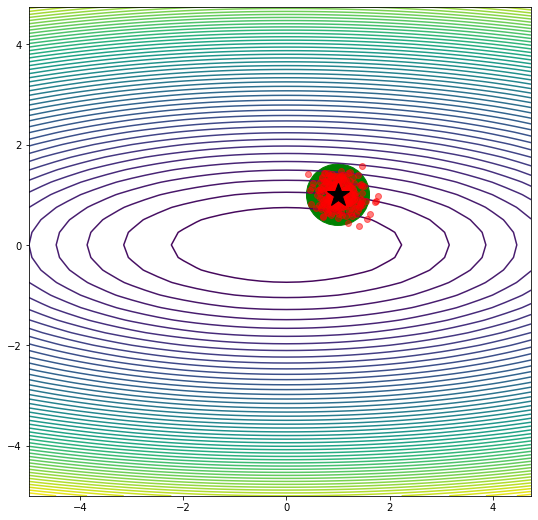

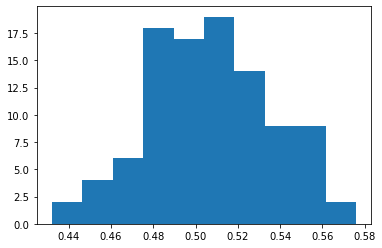

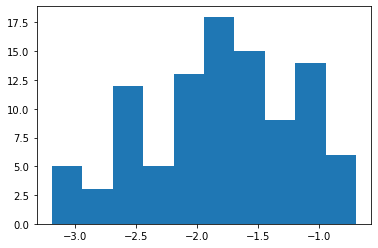

[1.22387342] [1.22387342]


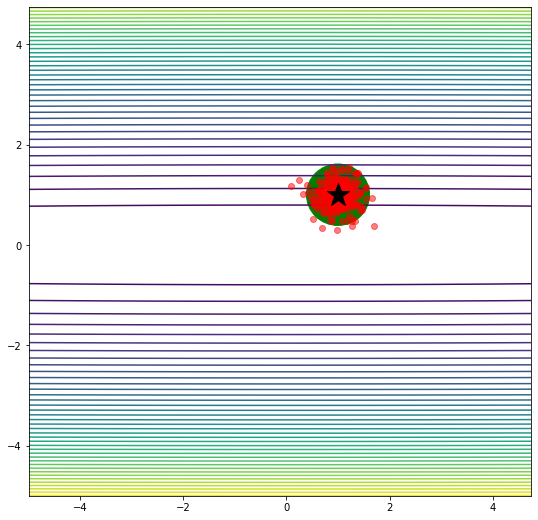

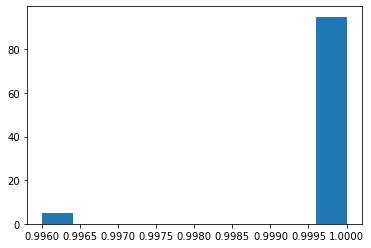

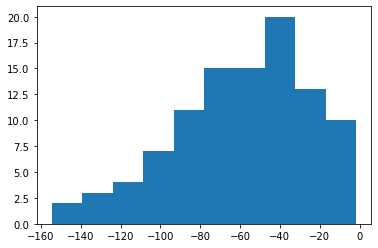

[1.22387342] [1.22387342]


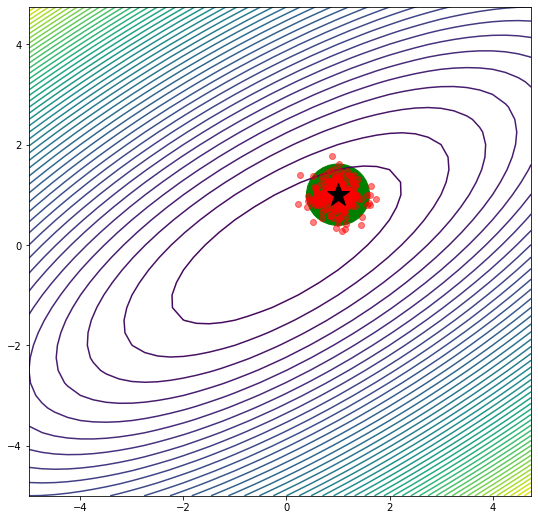

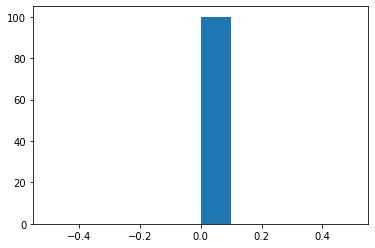

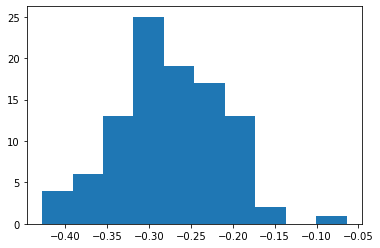

In [99]:
benchmark(sigma1, original_individual, objective_function_F1a, N, d, num_of_tests)
benchmark(sigma1, original_individual, objective_function_F1b, N, d, num_of_tests)
benchmark(sigma1, original_individual, objective_function_F1c, N, d, num_of_tests)

[1.22387342] [2.44774683]


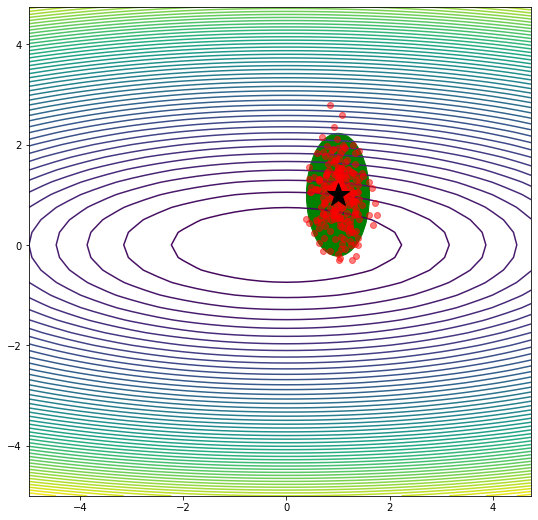

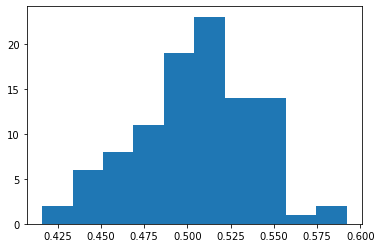

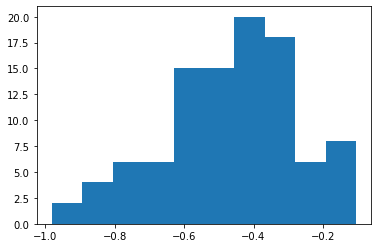

[1.22387342] [2.44774683]


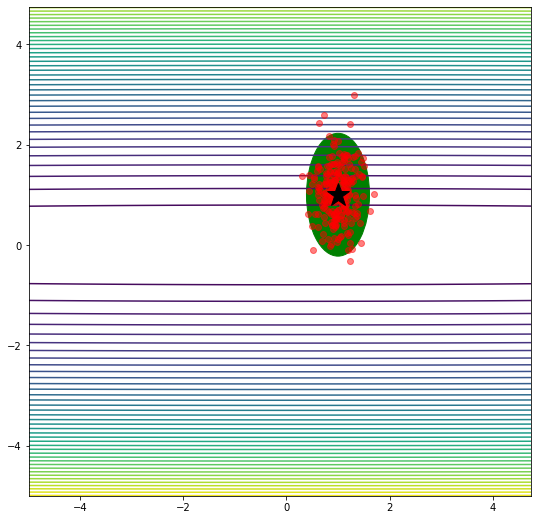

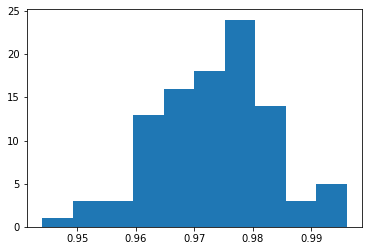

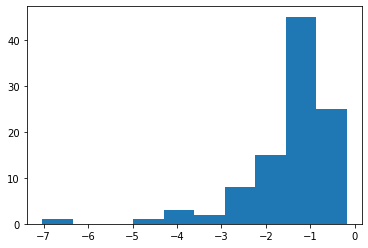

[1.22387342] [2.44774683]


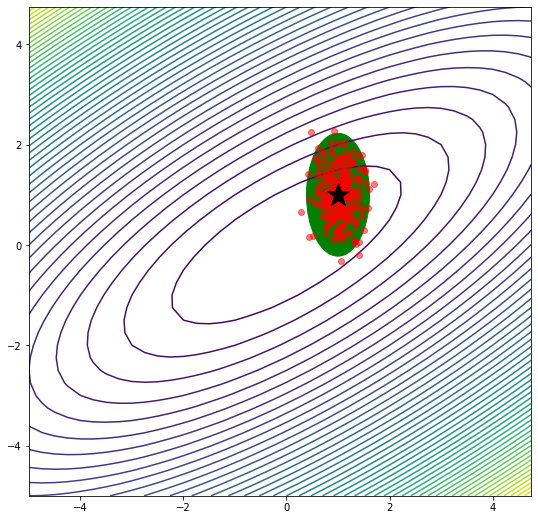

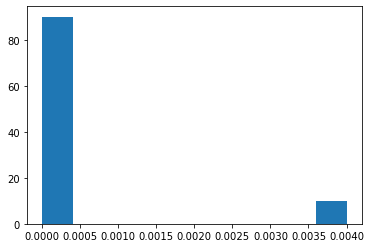

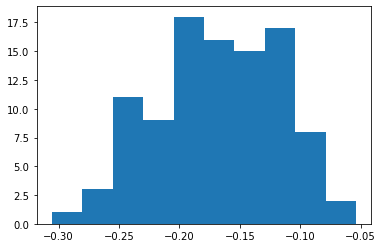

In [96]:
benchmark(sigma2, original_individual, objective_function_F1a, N, d, num_of_tests)
benchmark(sigma2, original_individual, objective_function_F1b, N, d, num_of_tests)
benchmark(sigma2, original_individual, objective_function_F1c, N, d, num_of_tests)

[1.51279074] [3.96053757]


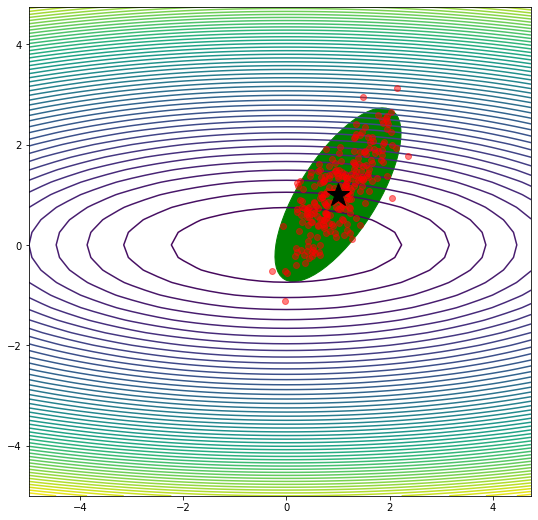

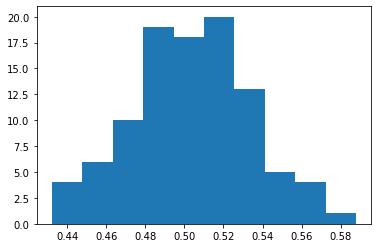

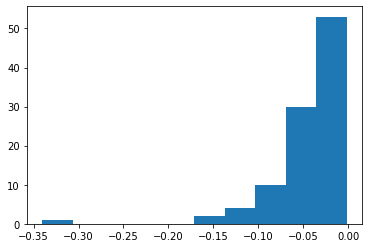

[1.51279074] [3.96053757]


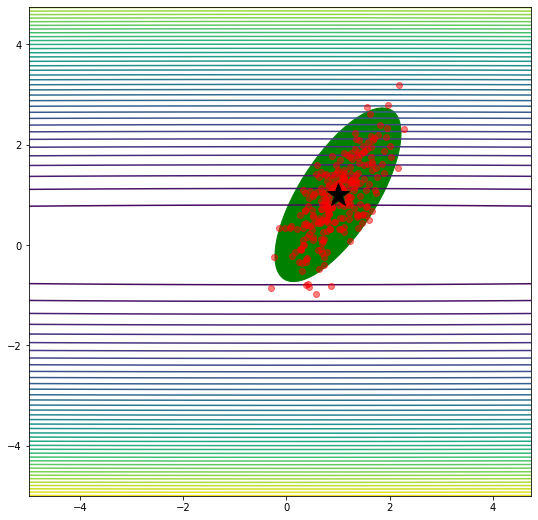

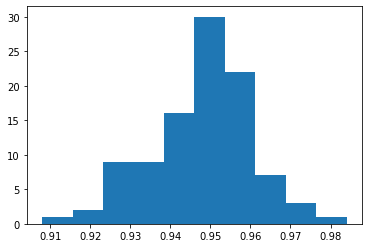

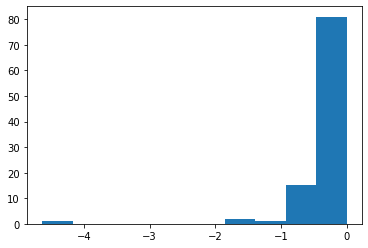

[1.51279074] [3.96053757]


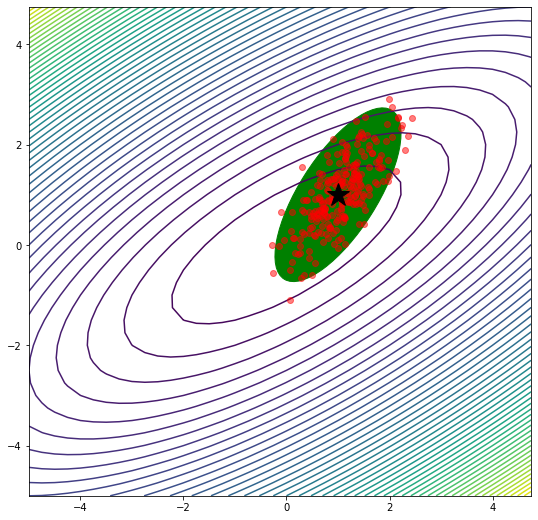

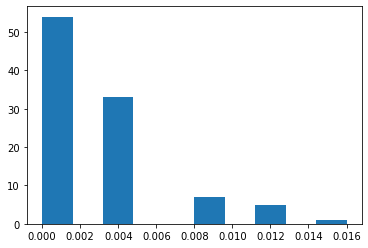

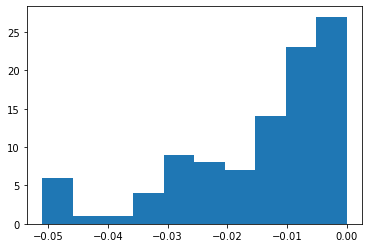

In [105]:
benchmark(sigma3, original_individual, objective_function_F1a, N, d, num_of_tests)
benchmark(sigma3, original_individual, objective_function_F1b, N, d, num_of_tests)
benchmark(sigma3, original_individual, objective_function_F1c, N, d, num_of_tests)